# notes:
* tensorflow is very picky about the shape of data, so even you np.ndarray is `(47, )`, you need to reshape it into `(47,1)` to make sure everything goes alright
* the shape of `np.array([1,2,3,4])` is `(4, )`, this is column vector. Be aware of the shape of data.
* Different optimizer have very huge difference between convergence speed in this convex example, [I need to learn more about differences of optimizers](http://sebastianruder.com/optimizing-gradient-descent/)
* Confused about whether I should use row vector or column vector and here is the answer: [Column Vectors Vs. Row Vectors](http://steve.hollasch.net/cgindex/math/matrix/column-vec.html)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

import tensorflow as tf

# prepare data

In [2]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
data = general.normalize_feature(raw_data)

print(data.shape)
data.head()

(47, 3)


,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [3]:
X_data = general.get_X(data)
print(X_data.shape, type(X_data))

y_data = general.get_y(data).reshape(len(X_data), 1)  # special treatment for tensorflow input data
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


# run the tensorflow graph over several optimizer

In [5]:
epoch = 2000
alpha = 0.01

In [6]:
optimizer_dict={'GD': tf.train.GradientDescentOptimizer,
                'Adagrad': tf.train.AdagradOptimizer,
                'Adam': tf.train.AdamOptimizer,
                'Ftrl': tf.train.FtrlOptimizer,
                'RMS': tf.train.RMSPropOptimizer
               }
results = []
for name in optimizer_dict:
    res = lr.linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])
    res['name'] = name
    results.append(res)

# plot them all

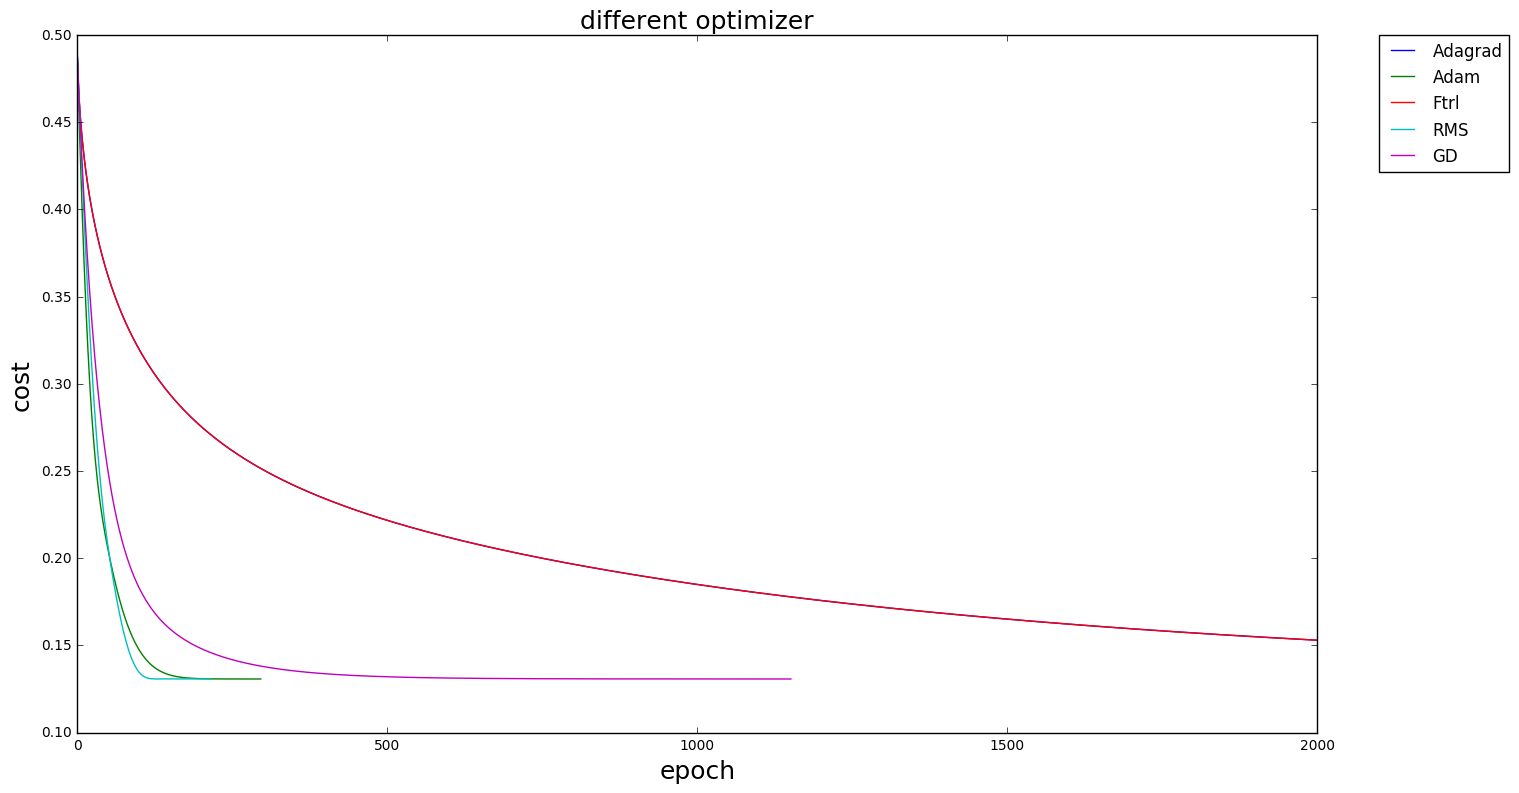

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))

for res in results: 
    loss_data = res['loss']
    
#     print('for optimizer {}'.format(res['name']))
#     print('final parameters\n', res['parameters'])
#     print('final loss={}\n'.format(loss_data[-1]))
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('different optimizer', fontsize=18)